# Bermudan Swaption using HW Model

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from financepy.utils import *
from financepy.products.bonds import *
from financepy.market.curves import *
from financepy.products.rates import *

## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [3]:
settle_dt = Date(1, 1, 2007)

We set up the discount curve

In [4]:
zero_dts = [Date(1,1,2008), Date(1,1,2009), Date(1,1,2010)]
zero_rates = [0.035, 0.04, 0.045]

In [5]:
discount_curve = DiscountCurveZeros(settle_dt, zero_dts, zero_rates,
                                      FrequencyTypes.ANNUAL)

First create a bond that we will use as a reference

In [6]:
issue_dt = Date(1, 1, 2000)
maturity_dt = Date(1, 1, 2010)
coupon = 0.0525
freq_type = FrequencyTypes.ANNUAL
dc_type = DayCountTypes.ACT_ACT_ICMA

In [7]:
bond = Bond(issue_dt, maturity_dt, coupon, freq_type, dc_type)

In [8]:
v = bond.clean_price_from_discount_curve(settle_dt, discount_curve)

In [9]:
print("Pure Bond Price:", v)

Pure Bond Price: 100.69375242268887


## Set up the Puttable Bond

Now specify the put and call dates

In [10]:
call_dts = []
call_prices = np.array([])
start_dt = Date(1, 1, 2008)
years = np.linspace(0.0, 2.0, 50)
put_dts = start_dt.add_years(years)
put_prices = np.array([100.0] * len(put_dts))

Now create the BondEmbeddedOption

In [11]:
puttable_bond = BondEmbeddedOption(issue_dt, maturity_dt, coupon, freq_type, dc_type,
                                     call_dts, call_prices, put_dts, put_prices)

### The Hull-White Model

In [12]:
sigma = 0.01  # basis point volatility
a = 0.1
num_time_steps = 200

In [13]:
model = HWTree(sigma, a, num_time_steps)

In [14]:
v = puttable_bond.value(settle_dt, discount_curve, model)

In [15]:
print(v)

{'bondwithoption': 102.9160216132857, 'bondpure': 102.14234331620247}


## Convergence Testing

In [16]:
time_steps = range(200, 500, 1)
values = []
for num_time_steps in time_steps:
    model = HWTree(sigma, a, num_time_steps)
    v = puttable_bond.value(settle_dt, discount_curve, model)
    values.append(v['bondwithoption'])

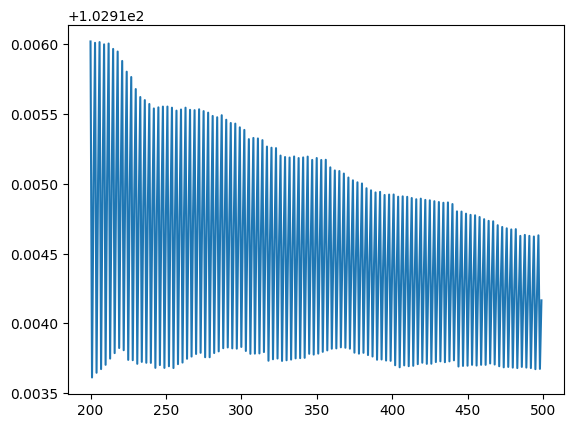

In [17]:
plt.plot(time_steps, values)

In [18]:
values[-1]

102.91416511246236

Matlab finds 102.9127

Copyright (c) 2020 Dominic O'Kane